In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2
from clib.bellhop import *
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

---
# Celerity profile selection

In [2]:
s = bellhop({'mediterrannee': '../SSP_4profils.mat'},name='cognac_cmap',rmax=100.)
#s.params

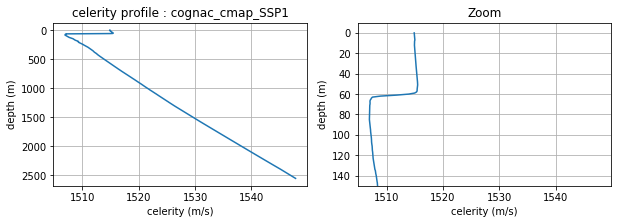

In [3]:
issp=0   # sound speed profile number
s.plotssp('mediterrannee', Issp=issp)

---
# Bellhop arrival calculations for this profile

- *Bathymetry* : flat bottom at 2000 m depth

- *Source* : one source at 100m depth at range 0km

- *Receivers* : **Depth** : from 0 to 500m depth    /    **Range** : from 0 to 10 km 

In [4]:
#Arr, Pos = s.read_arrivals_asc ('../files_arr/cognac_2000m_test_A_full.arr', Narrmx = 15)
Arr, Pos = s.load_dict('../Dictio', 'Arr1'), s.load_dict('../Dictio', 'Pos1')

In [5]:
Nsd = np.shape(Pos['s']['depth'])[0]
Nrd = np.shape(Pos['r']['depth'])[0]
Nrr = np.shape(Pos['r']['range'])[0]
print('Number of source depths   : Nsd = ', Nsd)
print('Number of receiver depths : Nrd = ', Nrd)
print('Number of receiver ranges : Nrr = ', Nrr)
print('\nTotal number of receivers : ', Nrd*Nrr)

Number of source depths   : Nsd =  1
Number of receiver depths : Nrd =  501
Number of receiver ranges : Nrr =  10001

Total number of receivers :  5010501


---
# Equivalent celerity 
We calculate equivalent celerity by 3 different methods :

<img src='../Partie2_celerite_equivalente/images/celerite_eq_petit.png' alt='Drawing' align='right' />

### A - First method : equivalent distance

__*Known*__: 
- Travel time from source to receiver for the detected ray. 
  
  
__*Calculated*__ : 
- Real distance travelled by each detected ray, for each receiver --> real celerity 
- Source-receiver distance, for each receiver --> **equivalent celerity**  




---
# Outputs from notebook "equivalent celerity"

In [6]:
#resolution choice 
dstep = 100#10          # depth step (here 10m)
rstep = 2000#100        # range step (here 1km)

In [7]:
Tarr_A = np.load('../Partie2_celerite_equivalente/NPY_cel/Tarr_A_new.npy')
Dist_real_A = np.load('../Partie2_celerite_equivalente/NPY_cel/Dist_real_A_new.npy')
Angle_diff_A = np.load('../Partie2_celerite_equivalente/NPY_cel/Angle_diff_A_new.npy')
Same_nbref_A = np.load('../Partie2_celerite_equivalente/NPY_cel/Same_nbref_A_new.npy')

Tarr_T = np.load('../Partie2_celerite_equivalente/NPY_cel/Tarr_T_new.npy')
Dist_real_T = np.load('../Partie2_celerite_equivalente/NPY_cel/Dist_real_T_new.npy')
Angle_diff_T = np.load('../Partie2_celerite_equivalente/NPY_cel/Angle_diff_T_new.npy')
Same_nbref_T = np.load('../Partie2_celerite_equivalente/NPY_cel/Same_nbref_T_new.npy')

Dist_eq = np.load('../Partie2_celerite_equivalente/NPY_cel/Dist_eq_new.npy')
C_mean = np.load('../Partie2_celerite_equivalente/NPY_cel/C_mean_new.npy')

---

# Can equivalent celerity be used ? 

In [8]:
isd = 0                 # source number (only 1 source here)
R = Pos['r']['range']
Z = Pos['r']['depth']
dstep = 10              # depth step (here 10m)
rstep = 100             # range step (here 1km)
r = R [::rstep]
z = Z [::dstep]

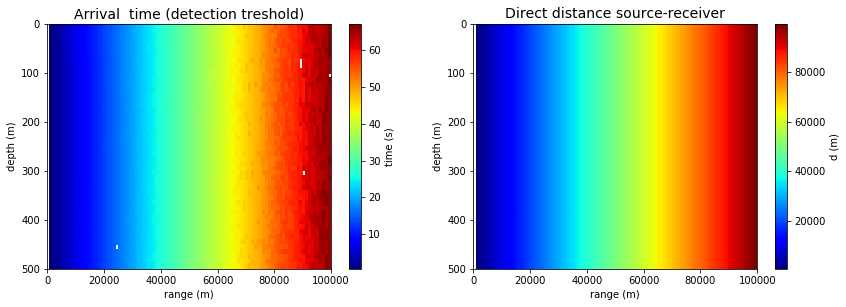

In [9]:
plt.figure(figsize=(14,4.5))
plt.subplot(121)
plt.pcolormesh(r, z, Tarr_T[:,:,isd].T, cmap='jet')
plt.title ('Arrival  time (detection treshold)', fontsize=14)
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("time (s)")
#plt.clim ([0,40])
plt.gca().invert_yaxis()

plt.subplot(122)
plt.pcolormesh(r, z, Dist_eq[:,:,isd].T, cmap='jet')
plt.title ('Direct distance source-receiver', fontsize=14)
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("d (m)")
#plt.clim ([0,40])
plt.gca().invert_yaxis()

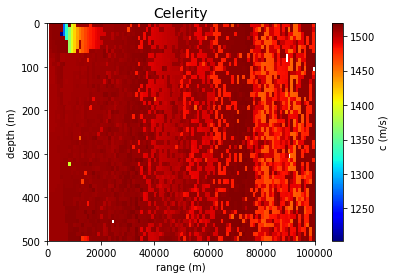

In [10]:
C = Dist_eq[:,:,isd].T / Tarr_T[:,:,isd].T
plt.figure()
plt.pcolormesh(r, z, C, cmap='jet')
plt.title ('Celerity', fontsize=14)
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("c (m/s)")
plt.gca().invert_yaxis()

In [11]:
# mean value of celerity
cmean = np.mean(C[~np.isnan(C)])
print('Mean celerity value = %.1f m/s' %cmean)

Mean celerity value = 1502.3 m/s


In [12]:
# RMS 
d_rms = np.sqrt( np.mean( (C[~np.isnan(C)] - cmean)**2 ) )
print ('RMS(celerity) = %.1f m/s' %d_rms)

RMS(celerity) = 18.6 m/s


##### Corresponding errors on distance : 

|                |      5km      |         10km  |         20km  |         50km  |         100km |
|----------------|---------------|---------------|---------------|---------------|---------------|
| **dc = 1m/s**  |       3m      |          7m   |         13m   |         33m   |         67m   |
| **dc = 5m/s**  |      17m      |          33m  |         67m   |         167m  |         333m  |
| **dc = 10m/s** |      33m      |         67m   |         133m  |         333m  |         667m  |
| **dc = 20m/s** |      67m      |         133m  |         267m  |         667m  |         1333m |

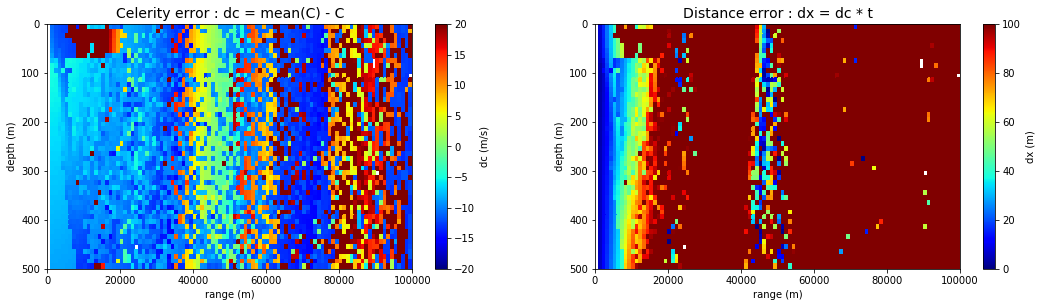

In [13]:
plt.figure(figsize=(18,4.5))
plt.subplot(121)
plt.pcolormesh(r, z, cmean - C, cmap='jet')
plt.title ('Celerity error : dc = mean(C) - C', fontsize=14)
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("dc (m/s)")
plt.gca().invert_yaxis()
plt.clim([-20,20])

plt.subplot(122)
dx = (cmean - C)* Tarr_T[:,:,isd].T
plt.pcolormesh(r, z, abs(dx), cmap='jet')
plt.title ('Distance error : dx = dc * t', fontsize=14)
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("dx (m)")
plt.gca().invert_yaxis()
plt.clim([0,100])


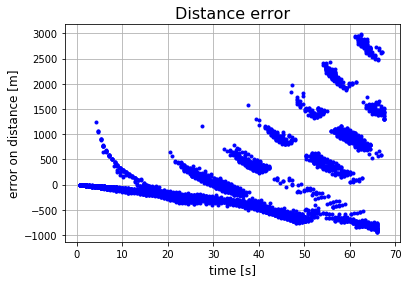

In [14]:
### error on distance : distance source/receiver - distance from equivalent celerity 
plt.figure()
plt.plot(Tarr_T[:,:,isd].T, dx, '.b')
plt.title('Distance error',fontsize=16)
plt.xlabel('time [s]',fontsize=12)
plt.ylabel('error on distance [m]',fontsize=12)
plt.grid()
plt.show()

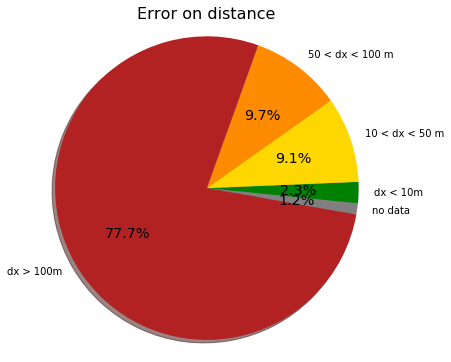

In [15]:
tot = np.shape(dx)[0]*np.shape(dx)[1]
nan = np.shape(np.where(np.isnan(dx)))[1]

under10 = np.shape( np.where(abs(dx) < 10)[0] )[0]
under50 = np.shape( np.where(np.logical_and(abs(dx) >=10, abs(dx) < 50))[0] )[0]
under100  = np.shape( np.where(np.logical_and(abs(dx) >=50, abs(dx) < 100))[0] )[0]
over100  = np.shape( np.where(abs(dx) >= 100)[0] )[0]

name = ['no data','dx < 10m','10 < dx < 50 m', '50 < dx < 100 m', 'dx > 100m' ]
data = [nan, under10, under50, under100, over100]
plt.figure(figsize=(6,6))
patches, texts, autotexts = plt.pie(data, labels=name, colors=['grey','g','gold','darkorange','firebrick'], \
                                    autopct='%1.1f%%', startangle=-10, shadow=True)  
for t in autotexts:
    t.set_color('k')
    t.set_size('x-large')

#autotexts[0].set    
plt.axis('equal')
plt.title ('Error on distance', fontsize=16)
plt.show()

We're expecting a 10m precision on distance ... In our case, using equivalent celerity is not possible.

# True arrival times table

In [16]:
# sonar equation
SL = 185                 # Souce level (dB)
NL = 81.7                # Noise level (dB)
DI = 0                   # Directivity index (dB)
B = 200                  # bandwidth (Hz)
T = 1                    # transmitted signal duration (s)
PG = 10.0*np.log10(B*T)  # Processing gain (dB)
#RT  = SL - TL - NL + DI + PG 

seuil_d = 10.

In [ ]:
Time = np.zeros( (Nrr, Nrd, Nsd) )
for isd1 in range (Nsd):
    for ird1 in range (Nrd) : 
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                A = abs(Arr['A'][irr1, :Narr, ird1, isd1])  # amplitude 
                TL = - 20.0*np.log10(A)
                RL = SL - TL - NL +DI + PG    # received level 
                t = Arr['delay'][irr1, :Narr, ird1, isd1]
                t_ok = t[np.where(RL > seuil_d)]
                
                if len(t_ok > 0): 
                    t_min = np.min(t_ok)
                    Time [irr1,ird1,isd1] = t_min
                    
                else : 
                    Time [irr1,ird1,isd1] = np.NaN
            else : 
                Time [irr1,ird1,isd1] = np.NaN

np.save('Time', Time)

In [20]:
Time = np.load('NPY_2D/Time.npy')

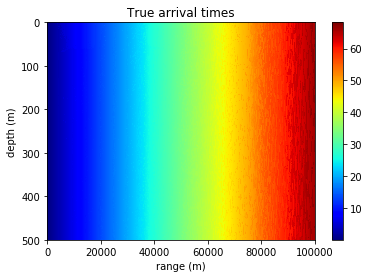

In [21]:
isd = 0    # source number (only 1 source here)
R = Pos['r']['range']
Z = Pos['r']['depth']
plt.pcolormesh(R, Z, Time[:,:,isd].T, cmap='jet')
plt.title ('True arrival times')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
#plt.clim([0,1e-4])
plt.gca().invert_yaxis()


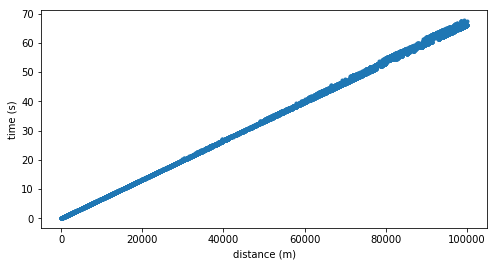

In [22]:
depth = 300
plt.figure(figsize=(8,4))
plt.plot(R, Time[:,depth,isd],'.')
plt.xlabel('distance (m)')
plt.ylabel('time (s)')
plt.show()

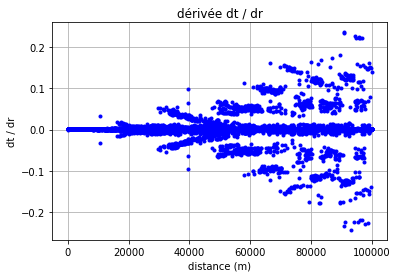

In [23]:
values = Time[:,depth,isd]
dx = R[1]-R[0]
derivees = [(values[i+1] - values[i])/dx for i in range(len(values)-1)]
plt.plot(R[:-1], derivees,'b.')
plt.xlabel('distance (m)')
plt.ylabel('dt / dr')
plt.title ('dérivée dt / dr')
plt.grid()
plt.show()